In [33]:
# Import packages here
import sqlite3
import pandas as pd
import geopandas as gpd
import numpy as np


import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import colors
import datetime as dt

import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from collections import Counter

In [34]:
fire = np.genfromtxt("C:/Users/20453/Desktop/computer_project/fire.csv",delimiter=",")
lat = fire[:,0]
lon = fire[:,1]
year = fire[:,2]
month = fire[:,3]
size = fire[:,4]
cause = fire[:,5]

In [35]:
size1= [] 
for i in range(len(size)):
    if size[i] >=100000:
        size1.append(i)
print(np.shape(size1))

size2= [] 
for i in range(len(size)):
    if 100000> size[i] >=50000:
        size2.append(i)
print(np.shape(size2))

size3= [] 
for i in range(len(size)):
    if 50000> size[i] >=10000:
        size3.append(i)
print(np.shape(size3))

size4= [] 
for i in range(len(size)):
    if size[i] <10000:
        size4.append(i)
print(np.shape(size4))

(25,)
(52,)
(331,)
(16588,)


In [36]:

lat_size1=[]
for j in size1:
    lat_size1.append(lat[j])
print(np.shape(lat_size1))
lon_size1=[]
for j in size1:
    lon_size1.append(lon[j])
print(np.shape(lon_size1))

lat_size2=[]
for j in size2:
    lat_size2.append(lat[j])
print(np.shape(lat_size2))
lon_size2=[]
for j in size2:
    lon_size2.append(lon[j])
print(np.shape(lon_size2))

lat_size3=[]
for j in size3:
    lat_size3.append(lat[j])
print(np.shape(lat_size3))
lon_size3=[]
for j in size3:
    lon_size3.append(lon[j])
print(np.shape(lon_size3))

lat_size4=[]
for j in size4:
    lat_size4.append(lat[j])
print(np.shape(lat_size4))
lon_size4=[]
for j in size4:
    lon_size4.append(lon[j])
print(np.shape(lon_size4))

(25,)
(25,)
(52,)
(52,)
(331,)
(331,)
(16588,)
(16588,)


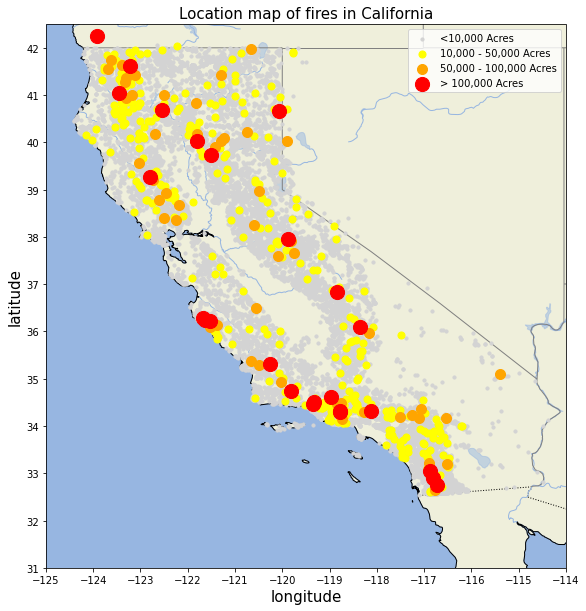

In [37]:
# Initiate new Figure and Axes  
fig = plt.figure(figsize=(10, 10))
proj = ccrs.PlateCarree()
ax1 = fig.add_subplot(1, 1, 1, projection=proj)

# Draw coastlines
ax1.coastlines()


# [left_longitude, right_longitude, bottom_latitude, top_latitude]
# Set the projection again, else weird things happen 
ax1.set_extent([-125, -114, 42.5, 32], crs=proj)

# Add features
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.BORDERS, linestyle=':')  # Make dotted lines
ax1.add_feature(cfeature.LAKES, alpha=0.5)  # Make transparent
ax1.add_feature(cfeature.RIVERS)
# ax1.add_feature(states,add)
resolution = '50m'
ax1.add_feature(cfeature.NaturalEarthFeature( 'cultural', 'admin_1_states_provinces_lines', resolution, edgecolor='gray', facecolor='none'))

# Add latitude and longitude values
ax1.set_xticks(range(-125,-113,1), crs=proj)
ax1.set_yticks(range(31,43,1), crs=proj)
ax1.set_xlabel('longitude',fontsize=15)
ax1.set_ylabel('latitude',fontsize=15)
              
              
# Add a title - just as in matplotlib
ax1.set_title('Location map of fires in California', fontsize=15)

ax1.scatter(lon_size4, lat_size4, c='lightgray', s=10, marker ='o',label='<10,000 Acres')
ax1.scatter(lon_size3, lat_size3, c='yellow', s=50, marker ='o',label='10,000 - 50,000 Acres')
ax1.scatter(lon_size2, lat_size2, c='orange', s=100, marker ='o',label='50,000 - 100,000 Acres')
ax1.scatter(lon_size1, lat_size1, c='red', s=200, marker ='o',label='> 100,000 Acres')


# can show fires from 1970 to 2018

# Legend
ax1.legend()
plt.show()

In [21]:
cnt=Counter(year)
#print(cnt.items())

#Calculate the burning area for each year
all_acres=[]
for k in range(1970,2019):
    yeark = []
    for i in range(len(year)):
        if year[i] == k:
            yeark.append(i)
    acresk=[]
    for j in yeark:
        acresk.append(size[j])
    burnarea=sum(acresk)
    all_acres.append(burnarea)
print(all_acres)


[671374.0, 60290.0, 92190.0, 221318.0, 130976.0, 189257.0, 193499.0, 459699.0, 114418.0, 332299.0, 332698.0, 317502.0, 149379.0, 105144.0, 212330.0, 544650.0, 126101.0, 863508.0, 307212.0, 143706.0, 362118.0, 58773.0, 208867.0, 328350.0, 371838.0, 202969.0, 659118.0, 221852.0, 167121.0, 804512.0, 261615.0, 259217.0, 978327.0, 983672.0, 287429.0, 323785.0, 802621.0, 1073676.0, 1422629.0, 477018.0, 117496.0, 234324.0, 864957.0, 588340.0, 580918.0, 817550.0, 538173.0, 1454927.0, 1656266.0]


In [22]:
# get rid of 'nan'
#Count the number of fires that occur each year 
year=year[~np.isnan(year)]
print(year)
cnt=Counter(year)
print(cnt.items())

#Calculate the burning area for each year
all_acres=[]
for k in range(1970,2019):
    yeark = []
    for i in range(len(year)):
        if year[i] == k:
            yeark.append(i)
    acresk=[]
    for j in yeark:
        acresk.append(size[j])
    burnarea=sum(acresk)
    all_acres.append(burnarea)
print(all_acres)

[1970. 1970. 1970. ... 2018. 2018. 2018.]
dict_items([(1970.0, 207), (1971.0, 98), (1972.0, 146), (1973.0, 130), (1974.0, 185), (1975.0, 169), (1976.0, 113), (1977.0, 185), (1978.0, 130), (1979.0, 313), (1980.0, 294), (1981.0, 273), (1982.0, 181), (1983.0, 192), (1984.0, 222), (1985.0, 208), (1986.0, 187), (1987.0, 279), (1988.0, 241), (1989.0, 201), (1990.0, 205), (1991.0, 110), (1992.0, 171), (1993.0, 192), (1994.0, 230), (1995.0, 225), (1996.0, 326), (1997.0, 236), (1998.0, 198), (1999.0, 301), (2000.0, 210), (2001.0, 300), (2002.0, 305), (2003.0, 430), (2004.0, 456), (2005.0, 697), (2006.0, 503), (2007.0, 551), (2008.0, 648), (2009.0, 439), (2010.0, 347), (2011.0, 543), (2012.0, 498), (2013.0, 434), (2014.0, 359), (2015.0, 460), (2016.0, 391), (2017.0, 833), (2018.0, 623)])
[nan, 59954.0, 89711.0, 224127.0, 129922.0, 189908.0, 193893.0, 459623.0, 114468.0, 332318.0, 332617.0, 316899.0, 150070.0, 104853.0, 208676.0, 548605.0, 125958.0, 863389.0, 307228.0, 143906.0, 361279.0, 59655.0

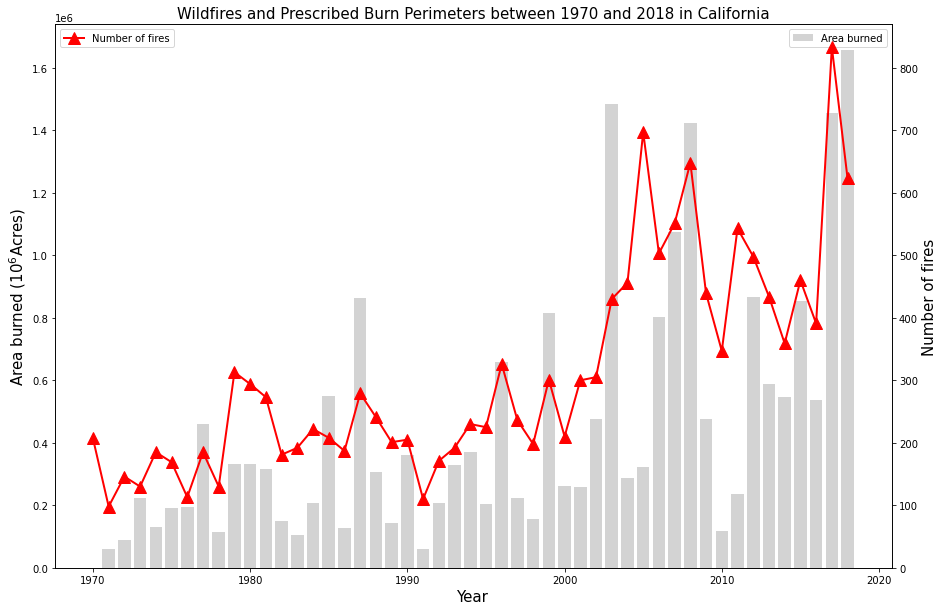

In [32]:
number_of_fires=[207,98,146,130,185,169,113,185,130,313,294,273,181,192,222,208,187,279,241,201,205,110,171,192,230,225,326,236,198,301,210,300,305,430,456,697,503,551,648,439,347,543,498,434,359,460,391,833,623]
Year = range(1970, 2019)
# Initiate new Figure
fig = plt.figure(figsize=(15,10))

# Set up axes and select map projection
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

#ax1.plot
ax1.bar(Year, all_acres, color='lightgrey', label='Area burned')
ax2.plot(Year, number_of_fires, '-^', linewidth=2, markersize=12, color='r', label='Number of fires')
# Add a legend containing the three labels
ax1.legend()
ax2.legend()

# add x and y axis labels
ax1.set_xlabel('Year',fontsize=15)
ax2.set_ylabel('Number of fires',fontsize=15)
ax1.set_ylabel('Area burned (10$^6$Acres)',fontsize=15)


# add a plot title
ax1.set_title('Wildfires and Prescribed Burn Perimeters between 1970 and 2018 in California',fontsize=15)
ax2.set_yticks(range(0, 900,100))
# ax1.set_yticks(range(0, 1600000,100000))

# Show plot
plt.show()

In [38]:

all_acres=[]
for k in range(1970,2019):
    yeark = []
    for i in range(len(year)):
        if year[i] == k:
            yeark.append(i)
    acresk=[]
    for j in yeark:
        acresk.append(size[j])
    burnarea=sum(acresk)
    all_acres.append(burnarea)
print(all_acres)



[671374.0, 60290.0, 92190.0, 221318.0, 130976.0, 189257.0, 193499.0, 459699.0, 114418.0, 332299.0, 332698.0, 317502.0, 149379.0, 105144.0, 212330.0, 544650.0, 126101.0, 863508.0, 307212.0, 143706.0, 362118.0, 58773.0, 208867.0, 328350.0, 371838.0, 202969.0, 659118.0, 221852.0, 167121.0, 804512.0, 261615.0, 259217.0, 978327.0, 983672.0, 287429.0, 323785.0, 802621.0, 1073676.0, 1422629.0, 477018.0, 117496.0, 234324.0, 864957.0, 588340.0, 580918.0, 817550.0, 538173.0, 1454927.0, 1656266.0]


In [39]:
year2017= [] 
for i in range(len(year)):
    if year[i] == 2017:
        year2017.append(i)
print(np.size(year2017))
acres2017=[]
for j in year2017:
    acres2017.append(size[j])
print(np.shape(acres2017))
sum(acres2017)

833
(833,)


1454927.0

In [40]:
#Calculate area burned for each month
area_month=[]
for k in range(1,13):
    monthk = []
    for i in range(len(month)):
        if month[i] == k:
            monthk.append(i)
    acresk=[]
    for j in monthk:
        acresk.append(size[j])
    burnarea=sum(acresk)
    area_month.append(burnarea)
print(area_month)

[113526.0, 83734.0, 82726.0, 157454.0, 572731.0, 2874418.0, 5896545.0, 5951085.0, 3016103.0, 2781528.0, 754089.0, 392069.0]


In [41]:
#Caculate number of fires for each month
fire_month=[]
for k in range(1,13):
    monthk = []
    for i in range(len(month)):
        if month[i] == k:
            monthk.append(i)
    fire_time=np.shape(monthk)
    fire_month.append(fire_time)
print(fire_month)
# Reduce the dimensions of arrays
number_of_fires=np.squeeze(fire_month)
print(number_of_fires)

[(297,), (239,), (320,), (484,), (1211,), (2405,), (2885,), (2534,), (1923,), (1799,), (791,), (287,)]
[ 297  239  320  484 1211 2405 2885 2534 1923 1799  791  287]


C:\Users\20453\AppData\Local\Temp/ipykernel_14220/2896637779.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],fontsize=12)


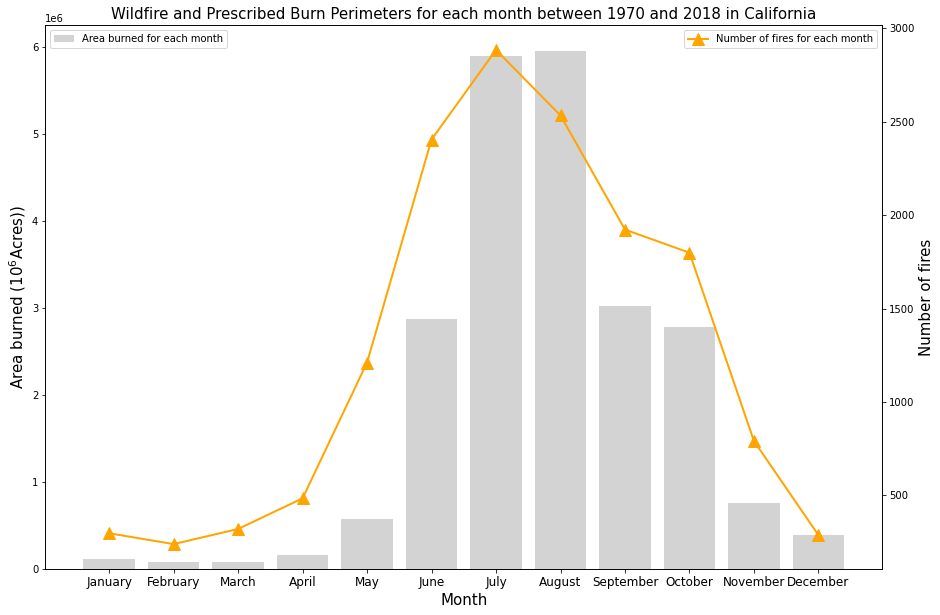

In [43]:
Months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Initiate new Figure
fig = plt.figure(figsize=(15,10))

# Set up axes and select map projection
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

#ax1.plot
ax1.bar(Months, area_month, color='lightgrey', label='Area burned for each month')
ax2.plot(Months, number_of_fires, '-^', linewidth=2, markersize=12, color='orange', label='Number of fires for each month')
# Add a legend containing the three labels
ax2.legend()
ax1.legend(loc='upper left')


# add x and y axis labels
ax1.set_xlabel('Month',fontsize=15)
ax2.set_ylabel('Number of fires',fontsize=15)
ax1.set_ylabel('Area burned (10$^6$Acres))',fontsize=15)

# add a plot title
ax1.set_title('Wildfire and Prescribed Burn Perimeters for each month between 1970 and 2018 in California',fontsize=15)
ax1.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],fontsize=12)


# Show plot
plt.show()

In [195]:
cause_light= [] 
for i in range(len(cause)):
    if cause[i] == 1:
        cause_light.append(i)
print(np.shape(cause_light))
lon_light=[]
for j in cause_light:
    lon_light.append(lon[j])
print(np.shape(lon_light))
lat_light=[]
for j in cause_light:
    lat_light.append(lat[j])
print(np.shape(lat_light))

cause_human= [] 
for i in range(len(cause)):
    if cause[i] == 2 or cause[i] == 3 or cause[1] == 4 or cause[i] == 6 or cause[i] == 7 or cause[i] == 8 or cause[i] == 10 or cause[i] == 11 or cause[i] == 12 or cause[i] == 13 or cause[i] == 16 :
        cause_human.append(i)
print(np.shape(cause_human))

lon_human=[]
for j in cause_human:
    lon_human.append(lon[j])
print(np.shape(lon_human))
lat_human=[]
for j in cause_human:
    lat_human.append(lat[j])
print(np.shape(lat_human))

(2424,)
(2424,)
(2424,)
(3058,)
(3058,)
(3058,)


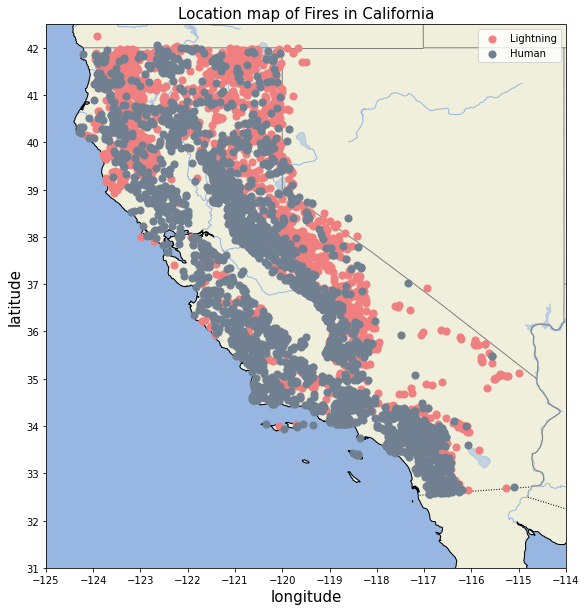

In [200]:
# Initiate new Figure and Axes  
fig = plt.figure(figsize=(10, 10))
proj = ccrs.PlateCarree()
ax1 = fig.add_subplot(1, 1, 1, projection=proj)

# Draw coastlines
ax1.coastlines()


# [left_longitude, right_longitude, bottom_latitude, top_latitude]
# Set the projection again, else weird things happen 
ax1.set_extent([-125, -114, 42.5, 32], crs=proj)

# Add features
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.BORDERS, linestyle=':')  # Make dotted lines
ax1.add_feature(cfeature.LAKES, alpha=0.5)  # Make transparent
ax1.add_feature(cfeature.RIVERS)
# ax1.add_feature(states,add)
resolution = '50m'
ax1.add_feature(cfeature.NaturalEarthFeature( 'cultural', 'admin_1_states_provinces_lines', resolution, edgecolor='gray', facecolor='none'))

# Add latitude and longitude values
ax1.set_xticks(range(-125,-113,1), crs=proj)
ax1.set_yticks(range(31,43,1), crs=proj)
ax1.set_xlabel('longitude',fontsize=15)
ax1.set_ylabel('latitude',fontsize=15)
              
              
# Add a title - just as in matplotlib
ax1.set_title('Location map of Fires in California', fontsize=15)

ax1.scatter(lon_light, lat_light, c='lightcoral', s=50, marker ='o',label='Lightning')
ax1.scatter(lon_human, lat_human, c='slategray', s=50, marker ='o',label='Human')

# Legend
ax1.legend()
plt.show()